In [2]:
import numpy as np 
import pandas as pd 

from transformers import BertTokenizer, TFBertModel
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn
#Yall know what these libraries are all for, seaborn if we want to get fancy with plotting

from sklearn import model_selection
#Cross validation, test-train split, etc

In [3]:
trainRaw = pd.read_csv("train.csv")
testRaw = pd.read_csv("test.csv")

In [4]:
print(trainRaw.shape)
print(trainRaw.iloc[0])

(12120, 6)
id                                                   5130fd2cb5
premise       and these comments were considered in formulat...
hypothesis    The rules developed in the interim were put to...
lang_abv                                                     en
language                                                English
label                                                         0
Name: 0, dtype: object


In [5]:
#Try with and without space?
combined_train_X = [trainRaw.iloc[i,1] + " " + trainRaw.iloc[i,2] for i in np.arange(trainRaw.shape[0])]
combined_train_y = [trainRaw.iloc[i,-1] for i in np.arange(trainRaw.shape[0])]
combined_test_X = [testRaw.iloc[i,1] + testRaw.iloc[i,2] for i in np.arange(testRaw.shape[0])]
combined_test_y = [testRaw.iloc[i,-1] for i in np.arange(testRaw.shape[0])]
print(len(combined_train_X))

12120


In [6]:
import nltk
#nltk.download('punkt')
from nltk.tokenize import word_tokenize

In [7]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
corpus = ['this is the first document',
         'this document is the second document',
        'and this is the third one',
         'is this the first document']
vocabulary = ['this', 'document', 'first', 'is', 'second', 'the',
             'and', 'one']
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)),
                ('tfid', TfidfTransformer())]).fit(corpus)
#print(pipe)

In [8]:
#train, test = model_selection.train_test_split(df, test_size = 0.2, random_state = 2023)

In [9]:
#def get_sub_accs(df,ys,language=True,category=True):
    #for i in 

In [10]:

# cleaning texts
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
 
'''dataset = [["I liked the movie", "positive"],
           ["It’s a good movie. Nice story", "positive"],
           ["Hero’s acting is bad but heroine looks good.\
            Overall nice movie", "positive"],
            ["Nice songs. But sadly boring ending.", "negative"],
            ["sad movie, boring movie", "negative"]]'''
             
#dataset = pd.DataFrame(dataset)
#dataset.columns = ["Text", "Reviews"]
 
#nltk.download('stopwords')
 
corpus = []
 
for i in range(0, len(combined_train_X)):
    text = re.sub('[^a-zA-Z]', '', combined_train_X[i])
    text = text.lower()
    text = text.split()
    ps = PorterStemmer()
    text = ''.join(text)
    corpus.append(text)
 
# creating bag of words model
cv = CountVectorizer(max_features = 1500)
 
X = cv.fit_transform(corpus).toarray()
print(len(X))
y = combined_train_y#dataset.iloc[:, 1].values
print(len(y))

12120
12120


In [11]:

# splitting the data set into training set and test set
 
X_train, X_test, y_train, y_test = model_selection.train_test_split(
           X, y, test_size = 0.2, random_state = 2023)

In [12]:
english_train = trainRaw[trainRaw["language"] == "English"]
lastDf = english_train
english_train_X = [lastDf.iloc[i,1] + " " + lastDf.iloc[i,2] for i in np.arange(lastDf.shape[0])]
english_train_y = [lastDf.iloc[i,-1] for i in np.arange(lastDf.shape[0])]
no_2_train = trainRaw[trainRaw["label"] !=2]
lastDf = no_2_train
no_2_X = [lastDf.iloc[i,1] + lastDf.iloc[i,2] for i in np.arange(lastDf.shape[0])]
no_2_y = [lastDf.iloc[i,-1] for i in np.arange(lastDf.shape[0])]
neutralornot_train = trainRaw.copy()
neutralornot_train[neutralornot_train.iloc[:,-1] == 2] = 0
lastDf = neutralornot_train
neutralornot_X = [lastDf.iloc[i,1] + lastDf.iloc[i,2] for i in np.arange(lastDf.shape[0])]
neutralornot_y = [lastDf.iloc[i,-1] for i in np.arange(lastDf.shape[0])]

#print(no_2_y[0])

In [13]:
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB


def naive_bayes_model(X,y,size_test=0.2):
    
    corpus = []
 
    for i in range(0, len(X)):
       text = re.sub('[^a-zA-Z]', '', combined_train_X[i])
       text = text.lower()
       text = text.split()
       ps = PorterStemmer()
       text = ''.join(text)
       corpus.append(text)
 
       # creating bag of words model
    cv = CountVectorizer(max_features = 1500)
       
    X = cv.fit_transform(corpus).toarray()
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
           X, y, test_size = size_test, random_state = 2023)
    classifier = GaussianNB();
    classifier = RandomForestClassifier();
    #print(y_train)
    classifier.fit(X_train, y_train)
    
    # predicting test set results
    y_pred = classifier.predict(X_test)
    
    # making the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    print(np.mean(y_test == y_pred))

In [14]:
print(len(english_train))
print(len(english_train_y))
naive_bayes_model(english_train_X,english_train_y,size_test=0.05)
naive_bayes_model(no_2_X,no_2_y)
naive_bayes_model(neutralornot_X,neutralornot_y)

6870
6870


NameError: name 'RandomForestClassifier' is not defined

In [ ]:

# fitting naive bayes to the training set

classifier = GaussianNB();
classifier.fit(X_train, y_train)
 
# predicting test set results
y_pred = classifier.predict(X_test)
 
# making the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(np.mean(y_test == y_pred))

[[  0   4 832]
 [  4   3 774]
 [  4   4 799]]
0.33085808580858084


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix

#from google.colab import drive
#drive.mount('/content/drive')

#dataset_path = "/content/drive/MyDrive/Datasets/amazon_cells_labelled.txt"
#data = pd.read_csv(dataset_path, sep="\t", header=None)
#data.head(10)

#X = data.iloc[:,0]
#X

#y = data.iloc[:,-1]
#y

vectorizer = CountVectorizer(stop_words='english')
X_vec = vectorizer.fit_transform(english_train_X)
X_vec = X_vec.todense()
X_vec = np.array(X_vec)
#print(X_vec)
#print(type(X_vec))
tfidf = TfidfTransformer(smooth_idf=True,use_idf=True) # by default applies "l2" normalization
X_tfidf = tfidf.fit_transform(X_vec)
X_tfidf = X_tfidf.todense()
X_tfidf

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, english_train_y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)
X_train = np.array(X_train)
X_test = np.array(X_test)
clf = MultinomialNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)


In [ ]:
print(confusion_matrix(y_test, y_pred))
print(np.mean(y_test == y_pred))

y_pred_new = y_pred.copy()
np.random.seed(2023)
y_pred_new[y_pred==0] = np.random.choice([1,2])
y_pred_new[y_pred==1] = np.random.choice([0,2])
y_pred_new[y_pred==2] = np.random.choice([1,0])
print(confusion_matrix(y_test, y_pred_new))
print(np.mean(y_test == y_pred_new))

np.random.seed(252)
y_pred_new[y_pred==0] = np.random.choice([1,2])
y_pred_new[y_pred==1] = np.random.choice([0,2])
y_pred_new[y_pred==2] = np.random.choice([1,0])
print(confusion_matrix(y_test, y_pred_new))
print(np.mean(y_test == y_pred_new))

np.random.seed(2)
y_pred_new[y_pred==0] = np.random.choice([1,2])
y_pred_new[y_pred==1] = np.random.choice([0,2])
y_pred_new[y_pred==2] = np.random.choice([1,0])
print(confusion_matrix(y_test, y_pred_new))
print(np.mean(y_test == y_pred_new))

[[176 189 238]
 [275  63 191]
 [331 175  80]]
0.18568102444703144
[[  0 238 365]
 [  0 191 338]
 [  0  80 506]]
0.40570430733410945
[[189 238 176]
 [ 63 191 275]
 [175  80 331]]
0.4138533178114086
[[238 176 189]
 [191 275  63]
 [ 80 331 175]]
0.40046565774155995


In [ ]:
from collections import Counter
import itertools
def get_most_common_words(X,y):
    X = np.array(X)
    y = np.array(y)
    #print(X[y==0])

    '''common_0 = np.array([i.split() for i in X[y==0]]).flatten()
    common_0 = list(itertools.chain.from_iterable(common_0))
    common_1 = np.array([i.split() for i in X[y==1]]).flatten()
    common_1 = list(itertools.chain.from_iterable(common_1))
    common_2 = np.array([i.split() for i in X[y[:]==2]]).flatten()
    common_2 = list(itertools.chain.from_iterable(common_2))'''
    common_0_1 = np.array([i.split() for i in trainRaw[y==0].iloc[:,1]]).flatten()
    common_0_1 = list(itertools.chain.from_iterable(common_0_1))
    common_0_2 = np.array([i.split() for i in trainRaw[y==0].iloc[:,2]]).flatten()
    common_0_2 = list(itertools.chain.from_iterable(common_0_2))
    common_1_1 = np.array([i.split() for i in trainRaw[y==1].iloc[:,1]]).flatten()
    common_1_1 = list(itertools.chain.from_iterable(common_1_1))
    common_1_2 = np.array([i.split() for i in trainRaw[y==1].iloc[:,2]]).flatten()
    common_1_2 = list(itertools.chain.from_iterable(common_1_2))
    common_2_1 = np.array([i.split() for i in trainRaw[y==2].iloc[:,1]]).flatten()
    common_2_1 = list(itertools.chain.from_iterable(common_2_1))
    common_2_2 = np.array([i.split() for i in trainRaw[y==2].iloc[:,2]]).flatten()
    common_2_2 = list(itertools.chain.from_iterable(common_2_2))
    # split() returns list of all the words in the string
    #split_it = data_set.split()
    #print(common_0)
    # Pass the split_it list to instance of Counter class.
    counter_0_1 = Counter(common_0_1)
    counter_0_2 = Counter(common_0_2)
    counter_1_1 = Counter(common_1_1)
    counter_1_2 = Counter(common_1_2)
    counter_2_1 = Counter(common_2_1)
    counter_2_2 = Counter(common_2_2)
    #print(Counters)

    # most_common() produces k frequently encountered
    # input values and their respective counts.
    occur_0_1 = counter_0_1.most_common(50)
    occur_0_1 = set([i[0] for i in occur_0_1])
    occur_0_2 = counter_0_2.most_common(50)
    occur_0_2 = set([i[0] for i in occur_0_2])
    occur_1_1 = counter_1_1.most_common(50)
    occur_1_1 = set([i[0] for i in occur_1_1])
    occur_1_2 = counter_1_2.most_common(50)
    occur_1_2 = set([i[0] for i in occur_1_2])
    occur_2_1 = counter_2_1.most_common(50)
    occur_2_1 = set([i[0] for i in occur_2_1])
    occur_2_2 = counter_2_2.most_common(50)
    occur_2_2 = set([i[0] for i in occur_2_2])
    #print(occur_0)
    #occur_1 = set(list(counter_1.most_common(100).keys()))#set(counter_1.most_common(100))
    #print(occur_1)
    #occur_2 = set(list(counter_2.most_common(100).keys()))#set(counter_2.most_common(100))
    #print(occur_2)
    #print(occur_0)
    #print(occur_1)
    #print(occur_2)
    #print(occur_0.difference(occur_1) ^ occur_0.difference(occur_2))
    #print(occur_1.difference(occur_0) ^ occur_0.difference(occur_2))
    #print(occur_2.difference(occur_0) ^ occur_0.difference(occur_1))
    print(occur_0_1.difference(occur_0_2))
    print(occur_0_2.difference(occur_0_1))
    print(occur_1_1.difference(occur_1_2))
    print(occur_1_2.difference(occur_1_1))
    print(occur_2_1.difference(occur_2_2))
    print(occur_2_2.difference(occur_2_1))

In [ ]:
A = set(["I", "A", "E"])
B = set(["B","E","C"])
A.difference(B)
occur_A = Counter(A).most_common(3)
occur_A = [i[0] for i in occur_A]
print(occur_A)
#print(occur_A.keys())

['A', 'E', 'I']


In [ ]:
#print(english_train_X[0].split())
print(len(english_train_X))
print(len(english_train_y))
get_most_common_words(english_train_X,english_train_y)

6870
6870


ValueError: Item wrong length 6870 instead of 12120.

107.30052681992338
52.67768199233716
107.46855670103093
58.116494845360826
107.35679133858268
51.10752952755905
2.2014549781294996
2.016641917209511
2.2714242750126044


(array([1.460e+03, 1.528e+03, 6.430e+02, 2.650e+02, 9.700e+01, 3.100e+01,
        1.700e+01, 8.000e+00, 7.000e+00, 4.000e+00, 1.000e+00, 0.000e+00,
        1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([ 0.18181818,  1.47948403,  2.77714988,  4.07481572,  5.37248157,
         6.67014742,  7.96781327,  9.26547912, 10.56314496, 11.86081081,
        13.15847666, 14.45614251, 15.75380835, 17.0514742 , 18.34914005,
        19.6468059 , 20.94447174, 22.24213759, 23.53980344, 24.83746929,
        26.13513514]),
 <BarContainer object of 20 artists>)

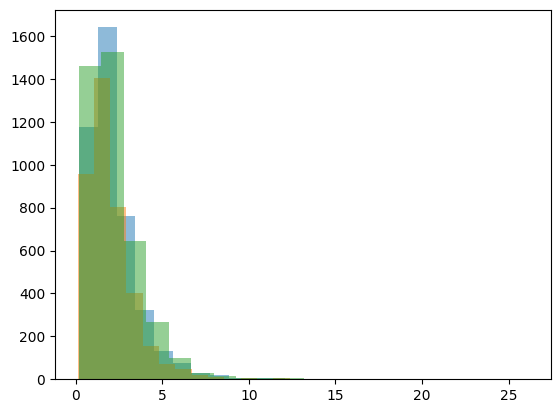

In [18]:
#train_0 = train
#train_1 = 
#train_2 = 
#len_1_0 = [len(i) for i in train0.iloc[,1]]
len_1_0 = np.array([len(i) for i in trainRaw[trainRaw["label"]==0].iloc[:,1]])
len_2_0 = np.array([len(i) for i in trainRaw[trainRaw["label"]==0].iloc[:,2]])
len_1_1 = np.array([len(i) for i in trainRaw[trainRaw["label"]==1].iloc[:,1]])
len_2_1 = np.array([len(i) for i in trainRaw[trainRaw["label"]==1].iloc[:,2]])
len_1_2 = np.array([len(i) for i in trainRaw[trainRaw["label"]==2].iloc[:,1]])
len_2_2 = np.array([len(i) for i in trainRaw[trainRaw["label"]==2].iloc[:,2]])
rat_0 = len_1_0/len_2_0
rat_1 = len_1_1/len_2_1
rat_2 = len_1_2/len_2_2

#combined_train_X = [trainRaw.iloc[i,1] + " " + trainRaw.iloc[i,2] for i in np.arange(trainRaw.shape[0])]
print(np.mean(len_1_0))
print(np.mean(len_2_0))
print(np.mean(len_1_1))
print(np.mean(len_2_1))
print(np.mean(len_1_2))
print(np.mean(len_2_2))
print(np.mean(rat_0))
print(np.mean(rat_1))
print(np.mean(rat_2))
plt.hist(rat_0,bins=20,alpha=0.5)
plt.hist(rat_1,bins=20,alpha=0.5)
plt.hist(rat_2,bins=20,alpha=0.5)

(array([1.000e+00, 1.000e+00, 2.000e+00, 5.000e+00, 8.000e+00, 1.800e+01,
        4.100e+01, 9.700e+01, 1.080e+02, 2.840e+02, 2.805e+03, 3.360e+02,
        2.020e+02, 5.600e+01, 3.400e+01, 2.600e+01, 1.100e+01, 1.200e+01,
        1.100e+01, 6.000e+00]),
 array([-2.     , -1.80625, -1.6125 , -1.41875, -1.225  , -1.03125,
        -0.8375 , -0.64375, -0.45   , -0.25625, -0.0625 ,  0.13125,
         0.325  ,  0.51875,  0.7125 ,  0.90625,  1.1    ,  1.29375,
         1.4875 ,  1.68125,  1.875  ]),
 <BarContainer object of 20 artists>)

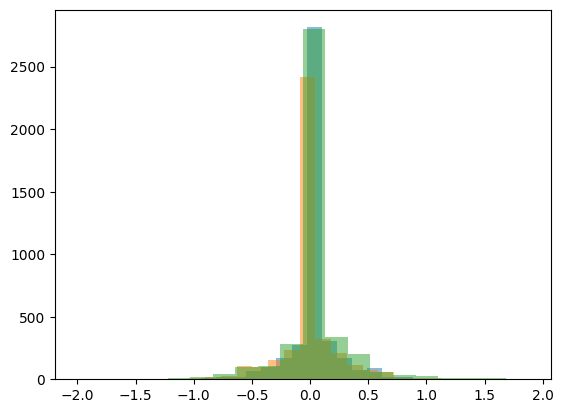

In [19]:
#sent_0 = dtf[column].apply(lambda x: 
#                   TextBlob(x).sentiment.polarity)
from textblob import TextBlob
#np.array([len(i) for i in trainRaw[trainRaw["label"]==0].iloc[:,1]])
sent_1_0 = np.array([TextBlob(i).sentiment.polarity for i in trainRaw[trainRaw["label"]==0].iloc[:,1]])
sent_2_0 = np.array([TextBlob(i).sentiment.polarity for i in trainRaw[trainRaw["label"]==0].iloc[:,2]])
sent_1_1 = np.array([TextBlob(i).sentiment.polarity for i in trainRaw[trainRaw["label"]==1].iloc[:,1]])
sent_2_1 = np.array([TextBlob(i).sentiment.polarity for i in trainRaw[trainRaw["label"]==1].iloc[:,2]])
sent_1_2 = np.array([TextBlob(i).sentiment.polarity for i in trainRaw[trainRaw["label"]==2].iloc[:,1]])
sent_2_2 = np.array([TextBlob(i).sentiment.polarity for i in trainRaw[trainRaw["label"]==2].iloc[:,2]])
dif_0 = sent_1_0 - sent_2_0
dif_1 = sent_1_1 - sent_2_1
dif_2 = sent_1_2 - sent_2_2
plt.hist(dif_0,bins=20,alpha=0.5)
plt.hist(dif_1,bins=20,alpha=0.5)
plt.hist(dif_2,bins=20,alpha=0.5)

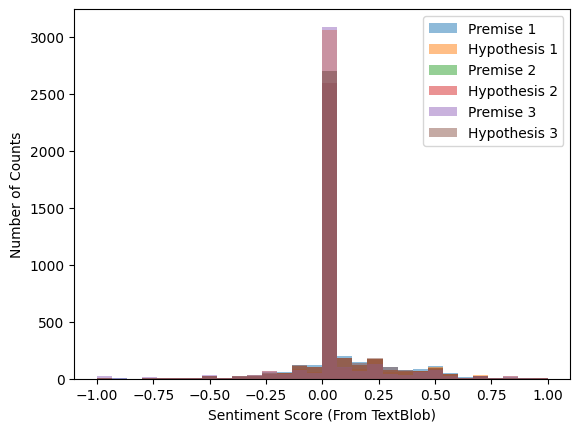

In [20]:
plt.hist(sent_1_0,bins=30,alpha=0.3)
plt.hist(sent_2_0,bins=30,alpha=0.3)
plt.hist(sent_1_1,bins=30,alpha=0.3)
plt.hist(sent_1_1,bins=30,alpha=0.3)
plt.hist(sent_2_2,bins=30,alpha=0.3)
plt.hist(sent_1_2,bins=30,alpha=0.3)
plt.xlabel("Sentiment Score (From TextBlob)")
plt.ylabel("Number of Counts")
plt.legend(["Premise 1", "Hypothesis 1","Premise 2", "Hypothesis 2","Premise 3", "Hypothesis 3"])

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
rf = RandomForestClassifier(n_estimators=50)
sent_1_arr = np.array([TextBlob(i).sentiment.polarity for i in trainRaw.iloc[:,1]])
sent_2_arr = np.array([TextBlob(i).sentiment.polarity for i in trainRaw.iloc[:,2]])
len_1_arr = np.array([len(i) for i in trainRaw.iloc[:,1]])
len_2_arr = np.array([len(i) for i in trainRaw.iloc[:,2]])
lang_arr = np.array(pd.get_dummies(trainRaw.iloc[:,-2]))
print(lang_arr)
print(lang_arr.shape)
X_eng = np.array((sent_1_arr,sent_2_arr,len_1_arr,len_2_arr,*(lang_arr.T)))
#for i in X_eng:
    #print(i.shape)
X_eng = np.array((sent_1_arr,sent_2_arr,len_1_arr,len_2_arr))


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(12120, 15)


In [22]:
print(X_eng.shape)
print(len(y))
test_val_rf = np.mean(cross_val_score(rf, X_eng.T, y, cv=20,n_jobs=-1))
print(test_val_rf)

(4, 12120)
12120
0.3500825082508251


In [23]:
from sklearn.tree import export_graphviz
# Export as dot file
rf.fit(X_eng,y)
feat_imp = rf.feature_importances_
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(feat_imp)) # the x locations for the groups
col = ["Premise Sentiment","Hypothesis Sentiment","Premise Length (Characters)","Hypothesis Length (Characters)",
                                 "Premise Length (Words)", "Hypothesis Length (Words)", "Premise Unique Words", "Hypothesis Unique Words", "Combined Unique Words"]
ax.barh(ind, feat_imp, width, color="green")
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title("Feature importance in RandomForest Classifier")
plt.xlabel("Relative importance")
plt.ylabel("feature") 
plt.figure(figsize=(5,5))
fig.set_size_inches(6.5, 4.5, forward=True)

'''export_graphviz(rf, out_file='tree.dot', 
                feature_names = ["Premise Sentiment","Hypothesis Sentiment","Premise Length (Characters)","Hypothesis Length (Characters)",
                                 "Premise Length (Words)", "Hypothesis Length (Words)", "Premise Unique Words", "Hypothesis Unique Words", "Combined Unique Words"],
                class_names = ["Support","Neutral","Refute"],
                rounded = True, proportion = False, 
                precision = 2, filled = True)'''

ValueError: Found input variables with inconsistent numbers of samples: [4, 12120]

In [25]:
def apply_sum_funcs(s1,s2,lang_dummies=False):
    sum_arr = []
    #print(s1)
    sum_arr.append(TextBlob(s1).sentiment.polarity+2)
    sum_arr.append(TextBlob(s2).sentiment.polarity+2)
    sum_arr.append(len(s1))
    sum_arr.append(len(s2))
    sum_arr.append(len(s1.split()))
    sum_arr.append(len(s2.split()))
    sum_arr.append(len(set(s1[0:-1].split())))
    sum_arr.append(len(set(s2[0:-1].split())))
    sum_arr.append(len(set((s1[0:-1] + " " + s2[0:-1]).split())))
    #if lang_dummies:
            #lang_arr = np.array(pd.get_dummies(trainRaw.iloc[:,-2]))
            #for i in lang_arr.T:
            #print i()
                  #sum_arr.append(i)
            #sum_arr.append(np.array((*(lang_arr.T))))

    return np.array(sum_arr)


In [26]:
testword = "reser."
testword[0:-1]

'reser'

In [27]:
print(type(trainRaw.iloc[0,1]))

<class 'str'>


In [28]:
X_train[0,0]

0

In [29]:
X_eng = np.array([apply_sum_funcs(trainRaw.iloc[i,1],trainRaw.iloc[i,2],lang_dummies=True) for i in np.arange(trainRaw.shape[0])])
#lang_arr = np.array(pd.get_dummies(trainRaw.iloc[:,-2]))
#for i in lang_arr.T:
    #X_eng.append(i)
#X_eng = np.array(X_eng)


In [80]:
lang_arr = np.array(pd.get_dummies(trainRaw.iloc[:,-2]))
lang_arr_test = pd.get_dummies(trainRaw.iloc[:,-2])
lang_labs = np.array(lang_arr_test.columns)
print(lang_labs)

['Arabic' 'Bulgarian' 'Chinese' 'English' 'French' 'German' 'Greek'
 'Hindi' 'Russian' 'Spanish' 'Swahili' 'Thai' 'Turkish' 'Urdu'
 'Vietnamese']


In [31]:
print(X_eng.shape)
print(X_eng[0,-2])

(12120, 9)
13.0


In [32]:
X_eng = np.hstack((X_eng,lang_arr))
print(X_eng.shape)
print(X_eng[0,:])

(12120, 24)
[ 2.   2.1 68.  81.  10.  14.  10.  13.  16.   0.   0.   0.   1.   0.
  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. ]


In [62]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
           X_eng, y, test_size = 0.2, random_state = 2023)
X_train = np.array(X_train)
y_train = np.array(y_train)

In [37]:
#from sklearn.naive_bayes import MultinomialNB
#clf = MultinomialNB()
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)

test_val_rf = np.mean(cross_val_score(clf, X_train, y_train, cv=10,n_jobs=-1))
print(test_val_rf)

0.3815985232942879


In [90]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_pred = cross_val_predict(clf, X_train, y_train, cv=10)
conf_mat = confusion_matrix(y_train, y_pred)

In [91]:
print(conf_mat)

[[1355  876 1094]
 [ 944 1272  930]
 [1197 1035  993]]


In [63]:
i = 0
print(X_test.shape)
#print(X_test[:,9+i]==1)
inds = X_test[:,9+i]==1
#inds = X_test[X_test[:,9+i]==1]
print(inds)
print(X_test.shape)
y_pred = clf.predict(X_test[inds])#X_test[:,9+i]==1])
y_test = np.array(y_test)
print(y_test.shape)
y_test_lang = y_test[inds]#X_test[:,9+i]==1]
print(y_test_lang)
print(np.mean(y_pred==y_test_lang))
#acc_array.append(np.mean(y_pred==y_test))

(2424, 24)
[False False False ... False False False]
(2424, 24)
(2424,)
[2 1 0 2 2 1 2 1 1 0 0 2 0 0 1 1 1 0 0 0 1 2 2 1 0 2 0 1 1 1 0 1 2 1 0 2 1
 2 1 0 1 0 0 1 1 1 2 0 1 0 1 2 1 2 0 1 0 0 1 1 0 1 1 2 1 2 1 2 2 1 2 2 2 1
 1 0 1 0 0 0 2 2 1 2 0]
0.36470588235294116


In [69]:
mean_array = []
for i in np.arange(10):
    X_train, X_test, y_train, y_test = model_selection.train_test_split(
           X_eng, y, test_size = 0.2)
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)
    #print((y_test,y_pred))
    #print(np.mean(y_pred==y_test))
    acc_array = []
    for i in np.arange(15):
        #9+i
        inds = X_test[:,9+i]==1
        y_pred = clf.predict(X_test[inds])#X_test[:,9+i]==1])
        y_test = np.array(y_test)
        y_test_lang = y_test[inds]#X_test[:,9+i]==1]
        acc_array.append(np.mean(y_pred==y_test_lang))
        '''inds = X_test[X_test[9+i]==1]
        print(inds)
        print(X_test.shape)
        y_pred = clf.predict(X_test[X_test[:,9+i]==1,:])
        y_test = y_test[X_test[9+i]==1,:]
        acc_array.append(np.mean(y_pred==y_test))'''
    print(acc_array)
    mean_array.append(acc_array)
mean_array = np.array(mean_array)

[0.3764705882352941, 0.3333333333333333, 0.30526315789473685, 0.3888059701492537, 0.42168674698795183, 0.47297297297297297, 0.38095238095238093, 0.36486486486486486, 0.3142857142857143, 0.3563218390804598, 0.45569620253164556, 0.27631578947368424, 0.27941176470588236, 0.2857142857142857, 0.4583333333333333]
[0.40229885057471265, 0.5056179775280899, 0.2727272727272727, 0.3917525773195876, 0.4383561643835616, 0.359375, 0.358974358974359, 0.35135135135135137, 0.20270270270270271, 0.4, 0.43283582089552236, 0.39436619718309857, 0.22950819672131148, 0.28, 0.4044943820224719]
[0.4375, 0.4, 0.313953488372093, 0.39985538684020244, 0.47368421052631576, 0.29411764705882354, 0.4157303370786517, 0.4153846153846154, 0.22972972972972974, 0.2972972972972973, 0.3561643835616438, 0.3157894736842105, 0.3333333333333333, 0.3333333333333333, 0.4794520547945205]
[0.34615384615384615, 0.34782608695652173, 0.3076923076923077, 0.3739067055393586, 0.375, 0.323943661971831, 0.45901639344262296, 0.441558441558441

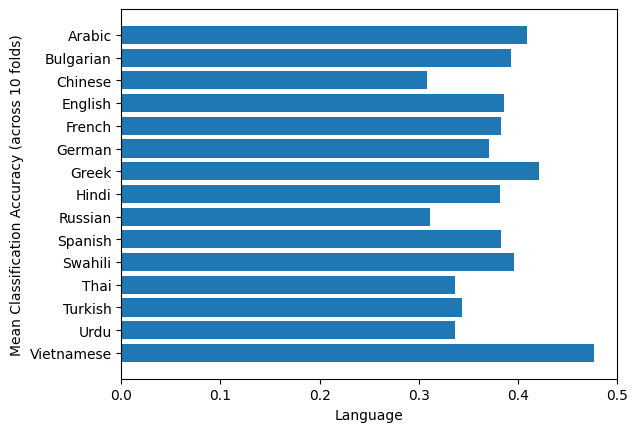

In [89]:
means_lang = np.mean(mean_array,axis=0)
labs = ["A","B","C","D","E","F","G","H","I","J","K","L","M","N","O"]
bar = plt.barh(lang_labs,means_lang)
plt.xlabel("Language")
plt.ylabel("Mean Classification Accuracy (across 10 folds)")
plt.gca().invert_yaxis()

#.gca().invert_xaxis()
#plt.show()
#plt.legend(["Premise 1", "Hypothesis 1","Premise 2", "Hypothesis 2","Premise 3", "Hypothesis 3"])